# Yahoo Tumblr


### Xin Zou


# Introduction

This case is aming for forecasing the Tumblr's future performance for next ten years and calibrate the acquisition of Yahoo. The main technique skills we used are monthly-growth rate, simple moving average, and the exponential smoothing models.

# Background

In May 2013, Marissa Mayer, the president and CEO of Yahoo! Inc. (Yahoo), announced Yahoo’s acquisition of Tumblr. Yahoo had agreed to pay $1.1 billion for the popular social network. Tumblr, which had 136 million people accessing its site worldwide in May 2013, up from 113 million 12 months earlier, was poised to become the next Facebook. The trend in the site’s past 38 months of traffic, however, revealed a different pattern.

# Analysis

### Import the data

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm # Time Series Analysis
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import seaborn as sns
import boxcox
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15,8

In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt

In [3]:
from pandas import DataFrame, read_csv

In [4]:
plt.rcParams['figure.figsize'] = 15,8

In [5]:
df1 = pd.read_excel(open('Yahoo.xlsx','rb'),sheet_name='Exhibit 1',index_col=None)

In [48]:
df2 = pd.read_excel(open('Yahoo.xlsx','rb'),sheet_name='Exhibit 4',index_col=None)

### Average montly growth rate

In [7]:
df1 = df1[4:43].reset_index()

In [8]:
df1.columns = df1.iloc[0]
df1 = df1[1:]

In [9]:
df1 = df1.drop(df1.columns[[0]], axis=1)

In [10]:
df1["Next"] = df1.People.shift(1)

In [11]:
df1["montly_growth_rate"] = (df1.People-df1.Next)/df1.Next

In [186]:
df1

,Date,Uniques,People,Visits,Page Views,Mobile Web,Next,montly_growth_rate
1,2010-04-01 00:00:00,25349036,19020118,69837544,1015761920,NaN,NaN,NaN
2,2010-05-01 00:00:00,28001532,21096692,75802128,1061456128,NaN,19020118,0.109178
3,2010-06-01 00:00:00,30279004,22496896,86279520,1265348480,NaN,21096692,0.0663708
4,2010-07-01 00:00:00,33237588,24571154,96291688,1470884480,NaN,22496896,0.092202
5,2010-08-01 00:00:00,37326484,27744680,105718912,1664430976,NaN,24571154,0.129157
6,2010-09-01 00:00:00,40863800,30076088,119718336,1854833792,NaN,27744680,0.0840308
7,2010-10-01 00:00:00,43169608,31175164,134986816,2291991808,NaN,30076088,0.0365432
8,2010-11-01 00:00:00,47188576,33880472,150272848,2823663104,NaN,31175164,0.0867777
9,2010-12-01 00:00:00,49037412,34924704,160452736,3311109376,NaN,33880472,0.0308211
10,2011-01-01 00:00:00,57963812,41301888,188368416,4086928384,NaN,34924704,0.182598


In [14]:
df1.montly_growth_rate.mean()

0.05620714320825897

In [17]:
r0 = 136477904
for i in range(0,115):
    r0 += r0*0.05620714320825897
print ("The predict accessing number in December 2022 is " + str(round(r0)))

The predict accessing number in December 2022 is 73486723098


### Moving average

In [18]:
Y1 = df1["People"].tolist()

In [19]:
import math

In [20]:
def moving_avg(n,k):
    yhat = []
    for i in range(0,n):
        sma = 0.0
        sma = math.fsum(Y1[i:i+k])
        yhat.append(sma/k)
        Y1.append(sma/k)
    return yhat

In [21]:
def mse(y,yhat,n):
    mse = 0.0
    for i in range(0,n):
        mse+=((Y1[i+(38-n)]-yhat[i])**2)
    return mse/n
              
def rmse(y,yhat,n):
    return math.sqrt(mse(y,yhat,n))


In [22]:
rmse_list = []
for k in range(1,38):
    yhat = moving_avg(38,k)
    #mse = mse(Y1,yhat,(38-k))
    rmse_list.append(rmse(Y1,yhat,(38-k)))

In [23]:
rmse_list.index(min(rmse_list))  # Find the minimum RMSE for setting the window

0

In [24]:
n = 180
yhat = []
k = 2 #Set the window for only rolling for 1

for i in range(0,n):
    sma = 0.0
    sma = math.fsum(Y1[i:i+k])
    yhat.append(sma/k)
    Y1.append(sma/k)

In [27]:
print ("If using moving average, the predict accessing number in December 2022 is " + str(round(Y1[153])))

If using moving average, the predict accessing number in December 2022 is 23977356


### We can also splite the data into training and test group

In [28]:
train = df1[0:30]
test = df1[30:38]

In [29]:
y_hat_sma = test.copy()

In [30]:
y_hat_sma["moving_avg_forecast"] = train["People"].rolling(2).mean().iloc[-1]

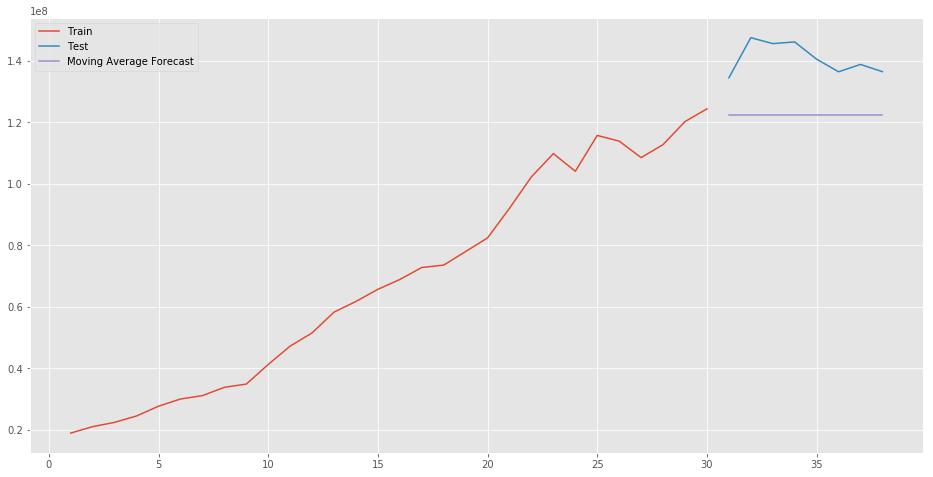

In [31]:
plt.figure(figsize=(16,8))
plt.plot(train['People'], label='Train')
plt.plot(test['People'], label='Test')
plt.plot(y_hat_sma['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.People, y_hat_sma.moving_avg_forecast))
print("The RMSE for the SMA is " + str(rms))

The RMSE for the SMA is 19028982.17695019


In [34]:
df1.montly_growth_rate[27:38].mean()

0.02195992040708468

In [35]:
df1.montly_growth_rate.mean()

0.05620714320825897

The average monthly growth rate over the past 12 months is **only half** of the average monthly growth rate over the past 37 months.

### Q3

Run exponential smoothing models against the data:

    (i) Holt's Linear Trend Model  
    (ii) Holt's Exponential Trend Model, and  
    (iii) Multiplicative Damped Trend Model
    
Which of your three models best fits the data?  Which would you select as your basis to forecast future cash flows and why?

### Holt's Linear Trend Model

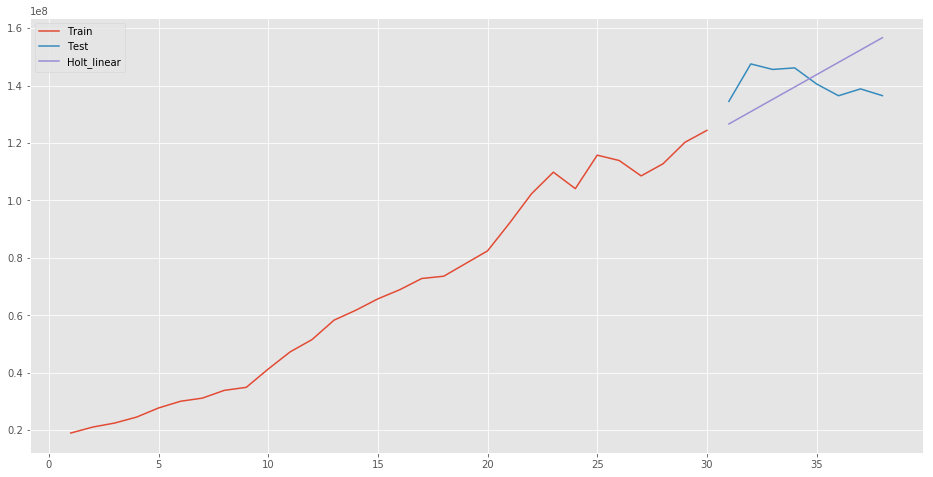

In [36]:
y_hat_linear = test.copy()

fit1 = Holt(np.asarray(train['People'])).fit(smoothing_level = 0.6,smoothing_slope = 0.6) #alpha is calculated by 2/(2+1)
y_hat_linear['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['People'], label='Train')
plt.plot(test['People'], label='Test')
plt.plot(y_hat_linear['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(test.People, y_hat_linear.Holt_linear))
print("The RMSE for the Holt's Linear Trend Model is " + str(rms))

The RMSE for the Holt's Linear Trend Model is 12379931.182362486


### Holt's Exponential Trend Model

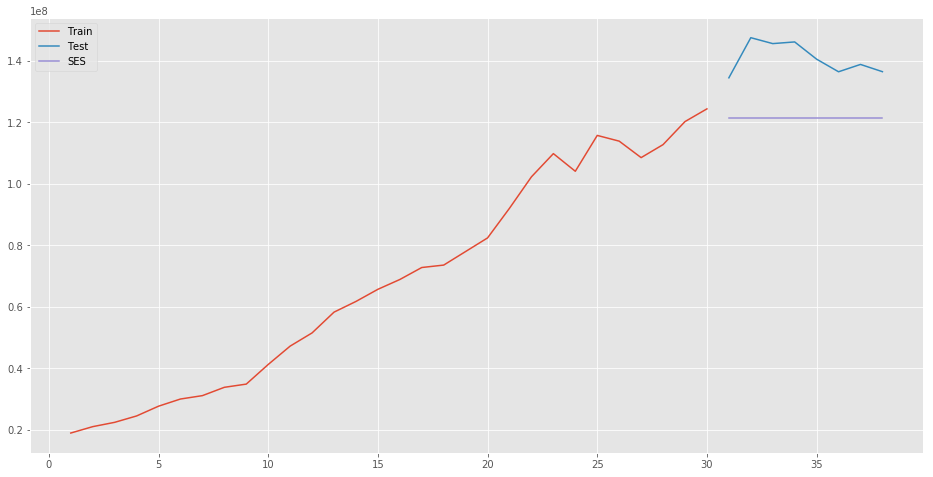

In [38]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_exp = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['People'])).fit(smoothing_level=0.6,optimized=False)
y_hat_exp['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['People'], label='Train')
plt.plot(test['People'], label='Test')
plt.plot(y_hat_exp['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [39]:
rms = sqrt(mean_squared_error(test.People, y_hat_exp.SES))
print("The RMSE for the Holt's Exponential Trend Model is " + str(rms))

The RMSE for the Holt's Exponential Trend Model is 19946840.994889244


### Multiplicative Damped Trend Model

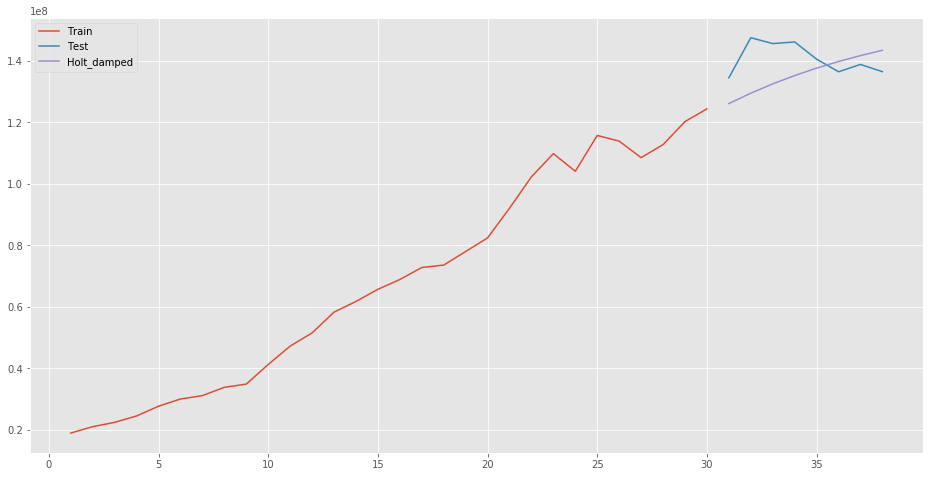

In [40]:
y_hat_damp = test.copy()

fit3 = Holt(np.asarray(train['People']),damped=True).fit(smoothing_level = 0.6,smoothing_slope = 0.6) #Delete context in fit()
y_hat_damp['Holt_damped'] = fit3.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['People'], label='Train')
plt.plot(test['People'], label='Test')
plt.plot(y_hat_damp['Holt_damped'], label='Holt_damped')
plt.legend(loc='best')
plt.show()

In [41]:
rms = sqrt(mean_squared_error(test.People, y_hat_damp.Holt_damped))
print("The RMSE for the Multiplicative Damped Trend Model is " + str(rms))

The RMSE for the Multiplicative Damped Trend Model is 9762788.03006129


I would suggest that we use the Multiplicative Damped Trend Model to make the forecast, since the RMSE is the smallest, and the user number will not increase as infinity so using the damped make sense.

In [182]:
pred = fit3.predict(start=0, end=153)

In [183]:
print ("THe forecasts of people in Decemver 2022 is " + str(round(pred[-1])))

THe forecasts of people in Decemver 2022 is 157866819.0


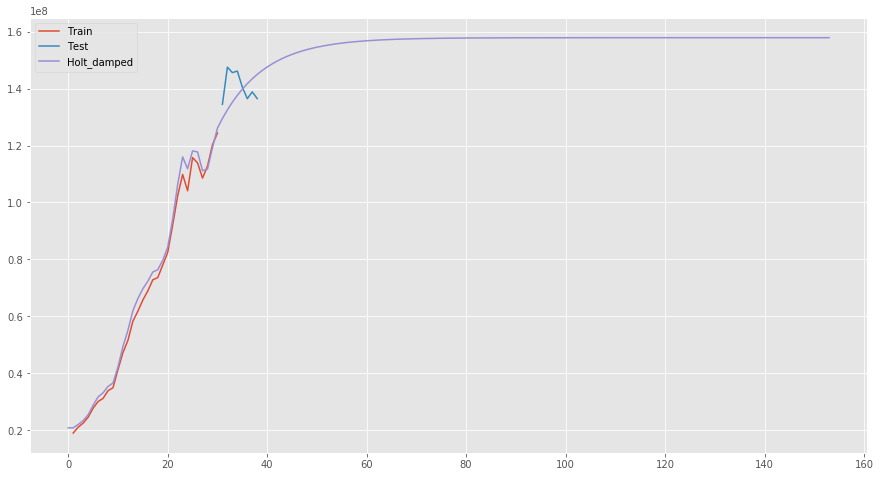

In [44]:
plt.plot(train['People'], label='Train')
plt.plot(test['People'], label='Test')
plt.plot(pred, label='Holt_damped')
plt.legend(loc='best')
plt.show()

Build the DCF model in python.

In [190]:
avg_people = [pred[34:46].mean(),pred[46:58].mean(),pred[46:70].mean(),pred[70:82].mean(),pred[82:94].mean(),pred[94:106].mean(),pred[106:118].mean(),pred[118:130].mean(),pred[130:142].mean(),pred[142:153].mean()]

In [198]:
perc_us = 0.33 
FB_rev_UE_us = 13.5794874313488   
FB_rev_UE_ros = 3.21162282610381  
rev_UE_us = 0.3            
rev_UE_ros =0.03  
discount = 0.1
perpetuity = 0.03

In [199]:
cash_flow = []
count = 0
for i in range(10):
    ppl_w = avg_people[i]
    ppl_us = ppl_w * perc_us
    ppl_ros = ppl_w - ppl_us
    user_eq_us = ppl_us / 2
    user_eq_ros = ppl_ros / 2
    revenue = (user_eq_us * FB_rev_UE_us + user_eq_ros * FB_rev_UE_ros) / 4.5
    if i ==0:
        revenue = revenue * (7/12)
    operate = revenue * 0.317
    if i == n-1 :
        term = (operate * (1+perpetuity))/(discount - perpetuity)
    else:
        term = 0
    cf = operate + term
    cash_flow.append(cf)
    count += 1
    
    perc_us = perc_us - 0.0167
    FB_rev_UE_us = FB_rev_UE_us + rev_UE_us
    FB_rev_UE_ros = FB_rev_UE_ros + rev_UE_ros

value = 0
for i in range(10):
    value += cash_flow[i] * ((1+ discount)**(-i))

In [200]:
print ("The new firm value is " + str(value))

The new firm value is 420626944.4768739


#### Facebook MAU forcasting

In [125]:
df2 = pd.read_excel(open('Yahoo.xlsx','rb'),sheet_name='Exhibit 4',index_col=None)

In [126]:
df2 = df2[6:16]

In [128]:
df2.columns = df2.iloc[0]

In [130]:
df2 = df2[1:]

In [132]:
df2 = df2.reset_index()

In [180]:
df2

6,index,Quarter,Advertising,Other Fees,Total Revenue,MAU,DAU,DAU/MAU,ARPU
0,7,2010:Q3,NaN,NaN,NaN,550,NaN,NaN,NaN
1,8,2010:Q4,655,76,731,608,327,0.537829,1.26252
2,9,2011:Q1,637,94,731,680,372,0.547059,1.13509
3,10,2011:Q2,776,119,895,739,417,0.564276,1.26145
4,11,2011:Q3,798,156,954,800,457,0.57125,1.23977
5,12,2011:Q4,943,188,1131,845,483,0.571598,1.37508
6,13,2012:Q1,872,186,1058,901,526,0.583796,1.21191
7,14,2012:Q2,992,192,1184,955,552,0.57801,1.27586
8,15,2012:Q3,1086,176,1262,1007,584,0.57994,1.28644


In [134]:
fcst = df2["MAU"]

In [150]:
fit4 = Holt(np.asarray(fcst),damped=True).fit(smoothing_level = 0.8,smoothing_slope = 0.2)
fcast4 = fit4.forecast(41)

In [171]:
Predict = fcast4.tolist()

No handles with labels found to put in legend.


[]

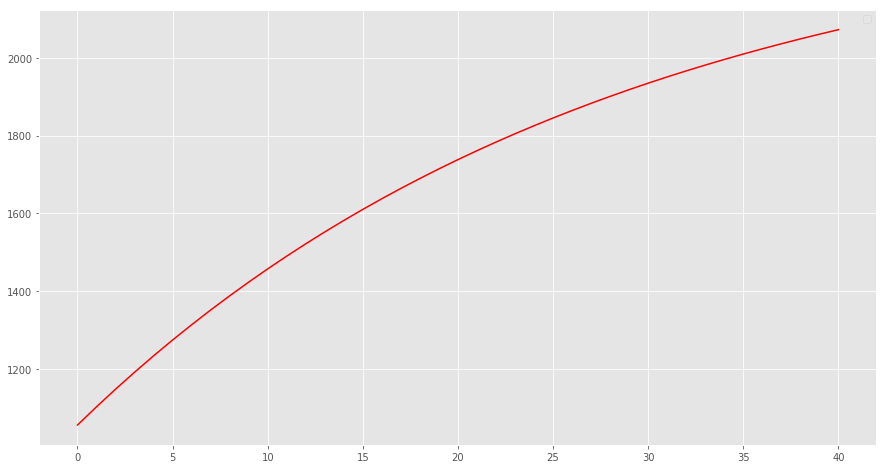

In [179]:
plt.plot(Predict,color='red')
plt.legend()
plt.plot()

From the models, The firm value is over-estimated by tumblr due to their high estimate for their users growth in the future. I don't recommend Yahoo to acquire the firm. And also, from the forecasting for Facebook, we can see a robust increasing for MAU(which is much accurate than the metrics that Tumble gave). 

----------------------------------------End Of the Document------------------------------------------------------